# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import statsbomb as sb

from mplsoccer import VerticalPitch

Documentation for libraries:

[statsbomb](https://pypi.org/project/statsbomb/)

[mplsoccer](https://mplsoccer.readthedocs.io)

# Get Data

## Get all events for a match
We are selecting the **UEFA Euro 2020 Final - ENG vs ITA**

In [2]:
events = sb.Events(event_id='3795506')

In [3]:
events

Events data for ID: 3795506

## Create dataframe keeping only shots

In [4]:
df = events.get_dataframe(event_type='shot')

In [5]:
df.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,follows_dribble,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z
0,shot,6605af47-8d44-4f52-9b8d-65598a9c0ef1,71,1,00:01:57.240,1,57,6,England,Regular Play,...,None,None,None,None,None,113.1,30.8,120.0,37.0,1.1
1,shot,43cfe556-8ddb-4555-9b06-916fdc87cec0,209,1,00:07:04.491,7,4,12,Italy,From Free Kick,...,None,None,None,None,None,95.0,54.7,120.0,42.4,4.2
2,shot,86fd78d6-b940-4466-b784-63c027a314da,879,1,00:27:13.854,27,13,46,Italy,From Free Kick,...,None,None,None,None,None,88.1,39.5,120.0,29.2,0.2
3,shot,25b8b5ce-f785-40cf-944c-21927bde4792,1287,1,00:34:39.568,34,39,57,Italy,From Throw In,...,None,None,None,None,None,95.9,46.8,120.0,45.1,0.2
4,shot,89226b23-db53-4e2e-865e-4dda2d1dbaa9,1721,1,00:45:54.658,45,54,74,Italy,From Throw In,...,None,None,None,None,None,106.4,41.6,109.1,42.0,NaN


Match went into a shootout

In [6]:
df = df[df["period"] != 5].copy()

In [7]:
print(len(df))

25


# Create Shot Map

## Create blank pitch

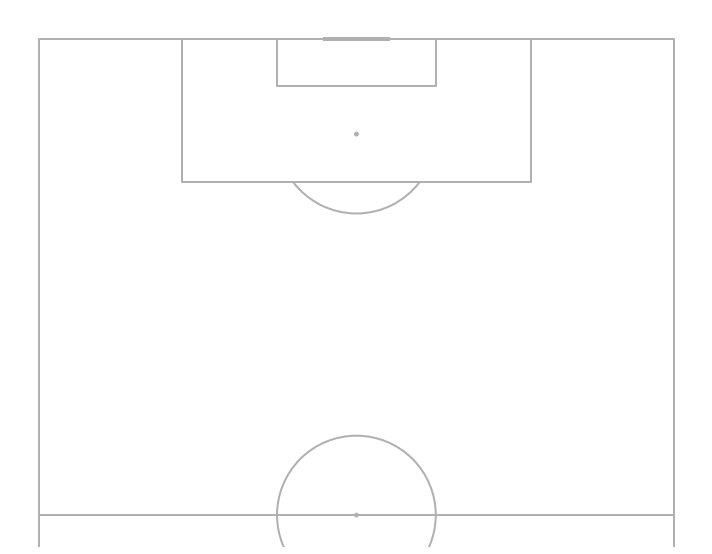

In [8]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))

## Basic shot map

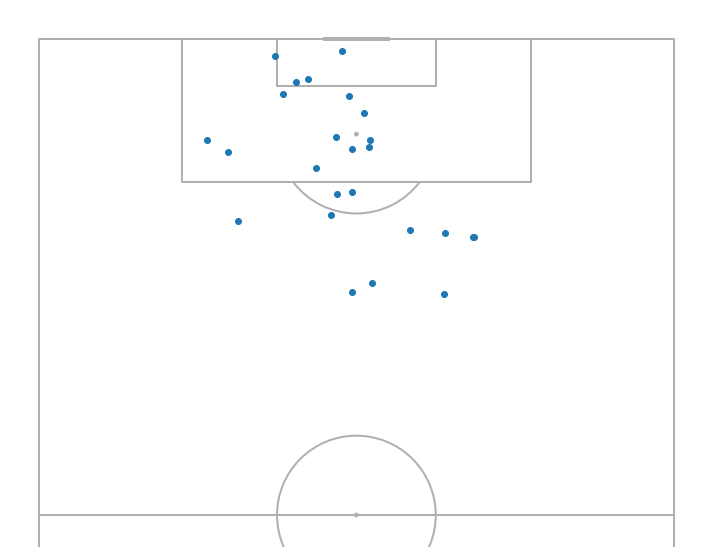

In [9]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
sc = pitch.scatter(df["start_location_x"], df["start_location_y"],
                   ax=ax)

## Modify size parameter

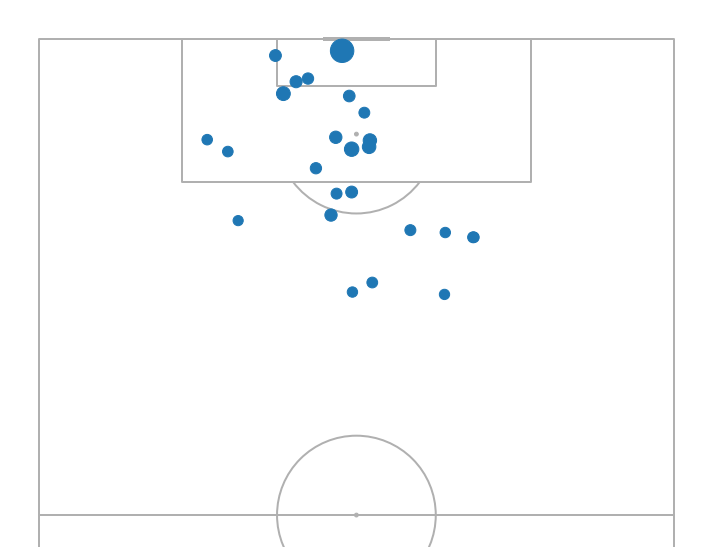

In [10]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
sc = pitch.scatter(df["start_location_x"], df["start_location_y"],
                   s=df["statsbomb_xg"]*500+100,
                   ax=ax)

## Modify marker color 

### Single color

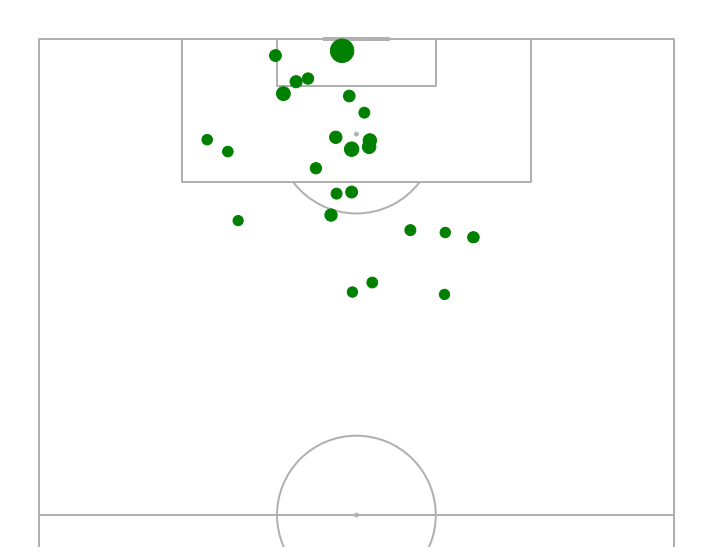

In [11]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
sc = pitch.scatter(df["start_location_x"], df["start_location_y"],
                   s=df["statsbomb_xg"]*500+100,
                   c="green",
                   ax=ax)

### Multicolor

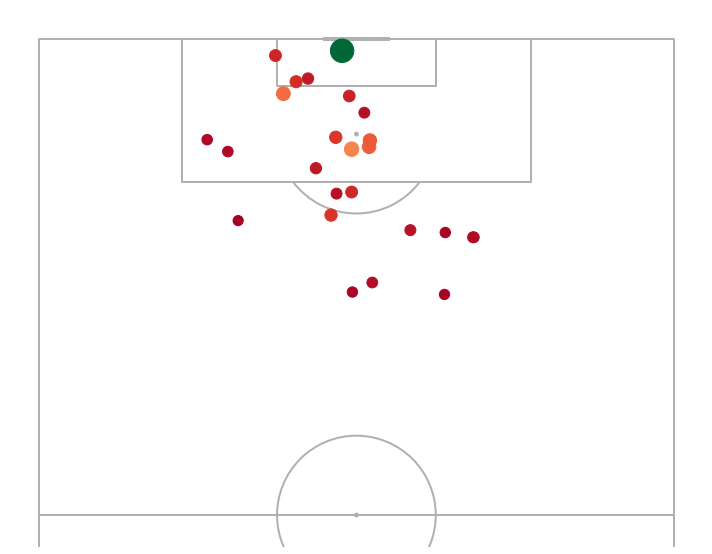

In [12]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
sc = pitch.scatter(df["start_location_x"], df["start_location_y"],
                   s=df["statsbomb_xg"]*500+100,
                   cmap="RdYlGn",
                   c=df["statsbomb_xg"],
                   ax=ax)

## Separate out Teams

Get team colors from https://teamcolours.netlify.app/

In [22]:
eng_color = "#C8102E"
ita_color = "#0000FF"

In [23]:
# Split df into two parts, one for each team
eng_df = df[df["team"] == "England"].copy()
ita_df = df[df["team"] == "Italy"].copy()

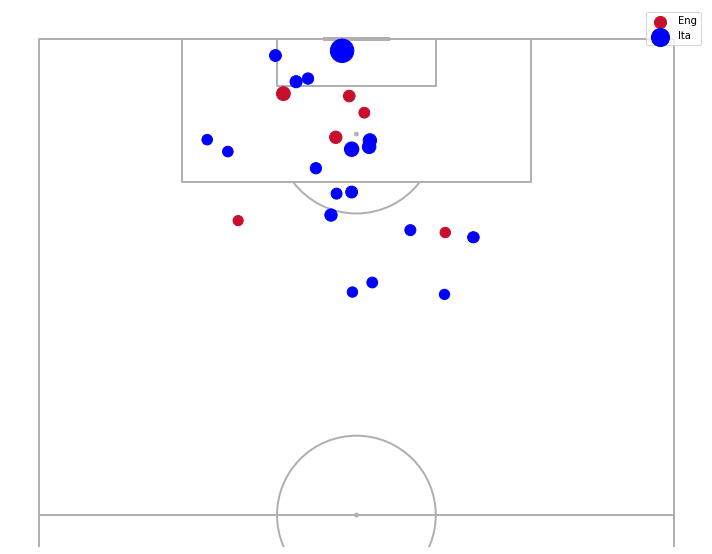

In [24]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
# Eng shots:
eng_sc = pitch.scatter(eng_df["start_location_x"], eng_df["start_location_y"],
                       s=eng_df["statsbomb_xg"]*500+100,
                       c=eng_color,
                       ax=ax,
                       label="Eng")
# Ita shots:
ita_sc = pitch.scatter(ita_df["start_location_x"], ita_df["start_location_y"],
                       s=ita_df["statsbomb_xg"]*500+100,
                       c=ita_color,
                       ax=ax,
                       label="Ita")
ax.legend()

## Separate out teams and goals

In [34]:
# Split England's df into two parts, goals and non-goals
eng_df_g = eng_df[eng_df["outcome"] == "Goal"].copy()
eng_df_ng = eng_df[eng_df["outcome"] != "Goal"].copy()

In [35]:
# Split Italy's df into two parts, goals and non-goals
ita_df_g = ita_df[ita_df["outcome"] == "Goal"].copy()
ita_df_ng = ita_df[ita_df["outcome"] != "Goal"].copy()

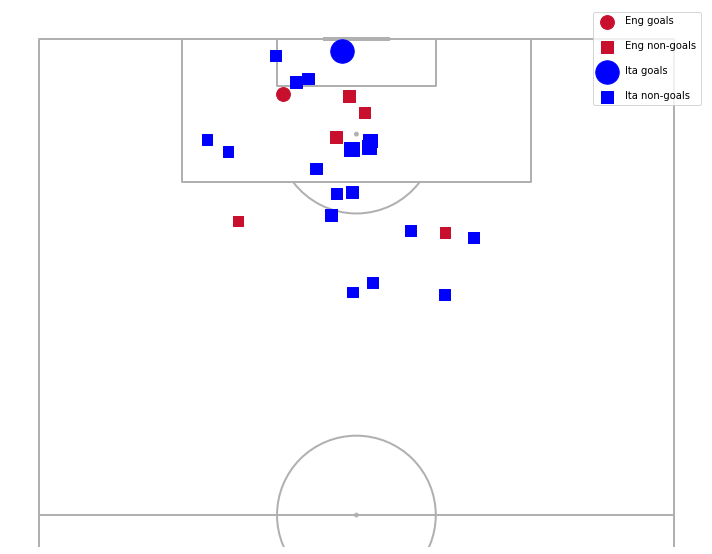

In [36]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
# Eng goals:
eng_sc_g = pitch.scatter(eng_df_g["start_location_x"],
                         eng_df_g["start_location_y"],
                         s=eng_df_g["statsbomb_xg"]*500+100,
                         c=eng_color,
                         ax=ax,
                         label="Eng goals")
# Eng non-goal shots:
eng_sc_ng = pitch.scatter(eng_df_ng["start_location_x"],
                          eng_df_ng["start_location_y"],
                          s=eng_df_ng["statsbomb_xg"]*500+100,
                          c=eng_color,
                          marker="s",
                          ax=ax,
                         label="Eng non-goals")

# Ita goals:
ita_sc_g = pitch.scatter(ita_df_g["start_location_x"],
                         ita_df_g["start_location_y"],
                         s=ita_df_g["statsbomb_xg"]*500+100,
                         c=ita_color,
                         ax=ax,
                         label="Ita goals")
# Ita non-goal shots:
ita_sc_ng = pitch.scatter(ita_df_ng["start_location_x"],
                          ita_df_ng["start_location_y"],
                          s=ita_df_ng["statsbomb_xg"]*500+100,
                          c=ita_color,
                          marker="s",
                          ax=ax,
                         label="Ita non-goals")
ax.legend(labelspacing=1.5)

### Change marker for goals

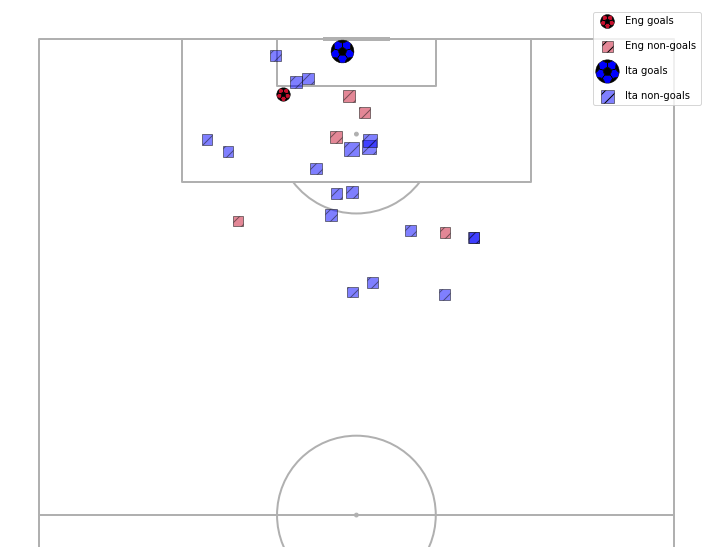

In [38]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
# Eng goals:
eng_sc_g = pitch.scatter(eng_df_g["start_location_x"],
                         eng_df_g["start_location_y"],
                         s=eng_df_g["statsbomb_xg"]*500+100,
                         marker="football",
                         c=eng_color,
                         ax=ax,
                         label="Eng goals")
# Eng non-goal shots:
eng_sc_ng = pitch.scatter(eng_df_ng["start_location_x"],
                          eng_df_ng["start_location_y"],
                          s=eng_df_ng["statsbomb_xg"]*500+100,
                          c=eng_color,
                          alpha=0.5,
                          hatch="//",
                          edgecolor="#101010",
                          marker="s",
                          ax=ax,
                         label="Eng non-goals")

# Ita goals:
ita_sc_g = pitch.scatter(ita_df_g["start_location_x"],
                         ita_df_g["start_location_y"],
                         s=ita_df_g["statsbomb_xg"]*500+100,
                         marker="football",
                         c=ita_color,
                         ax=ax,
                         label="Ita goals")
# Ita non-goal shots:
ita_sc_ng = pitch.scatter(ita_df_ng["start_location_x"],
                          ita_df_ng["start_location_y"],
                          s=ita_df_ng["statsbomb_xg"]*500+100,
                          c=ita_color,
                          alpha=0.5,
                          hatch="//",
                          edgecolor="#101010",
                          marker="s",
                          ax=ax,
                         label="Ita non-goals")
ax.legend(labelspacing=1.5)

## One team-One Graph

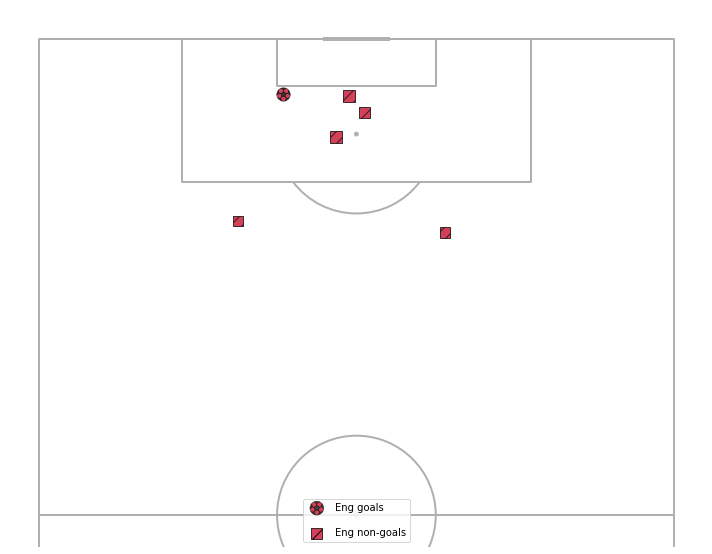

In [54]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
# Eng goals:
eng_sc_g = pitch.scatter(eng_df_g["start_location_x"],
                         eng_df_g["start_location_y"],
                         s=eng_df_g["statsbomb_xg"]*500+100,
                         marker="football",
                         c=eng_color,
                         edgecolor="#101010",
                         alpha=.8,
                         ax=ax,
                         label="Eng goals")
# Eng non-goal shots:
eng_sc_ng = pitch.scatter(eng_df_ng["start_location_x"],
                          eng_df_ng["start_location_y"],
                          s=eng_df_ng["statsbomb_xg"]*500+100,
                          c=eng_color,
                          alpha=.8,
                          hatch="//",
                          edgecolor="#101010",
                          marker="s",
                          ax=ax,
                          label="Eng non-goals")
ax.legend(labelspacing=1.5, loc="lower center")

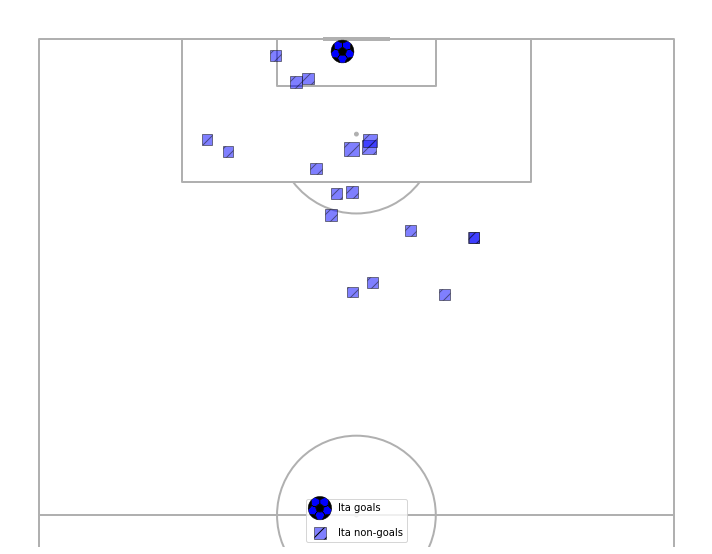

In [53]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
# Ita goals:
ita_sc_g = pitch.scatter(ita_df_g["start_location_x"],
                         ita_df_g["start_location_y"],
                         s=ita_df_g["statsbomb_xg"]*500+100,
                         marker="football",
                         c=ita_color,
                         ax=ax,
                         label="Ita goals")
# Ita non-goal shots:
ita_sc_ng = pitch.scatter(ita_df_ng["start_location_x"],
                          ita_df_ng["start_location_y"],
                          s=ita_df_ng["statsbomb_xg"]*500+100,
                          c=ita_color,
                          alpha=0.5,
                          hatch="//",
                          edgecolor="#101010",
                          marker="s",
                          ax=ax,
                          label="Ita non-goals")
ax.legend(labelspacing=1.5, loc="lower center")

## Let's add some text

### Title

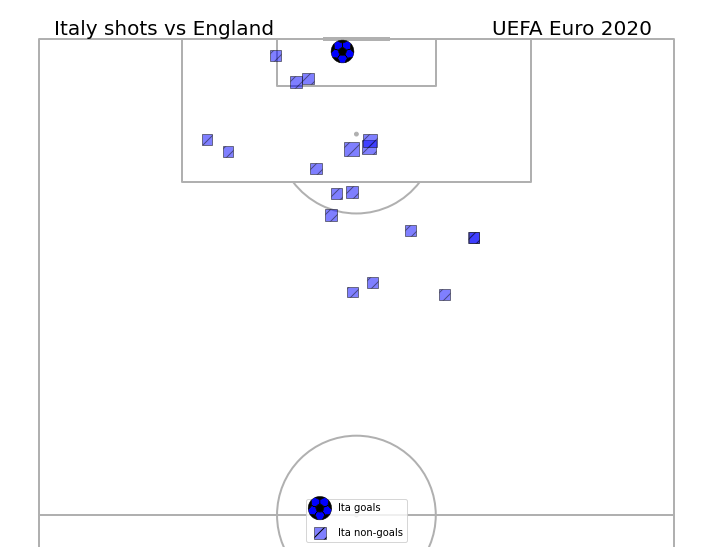

In [52]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
# Ita goals:
ita_sc_g = pitch.scatter(ita_df_g["start_location_x"],
                         ita_df_g["start_location_y"],
                         s=ita_df_g["statsbomb_xg"]*500+100,
                         marker="football",
                         c=ita_color,
                         ax=ax,
                         label="Ita goals")
# Ita non-goal shots:
ita_sc_ng = pitch.scatter(ita_df_ng["start_location_x"],
                          ita_df_ng["start_location_y"],
                          s=ita_df_ng["statsbomb_xg"]*500+100,
                          c=ita_color,
                          alpha=0.5,
                          hatch="//",
                          edgecolor="#101010",
                          marker="s",
                          ax=ax,
                          label="Ita non-goals")
fig.text(0.08, 0.92, "Italy shots vs England",
         size=20,
         ha="left")
fig.text(0.8, 0.92, "UEFA Euro 2020",
         size=20,
         ha="center")
ax.legend(labelspacing=1.5, loc="lower center")

### Basic info

In [42]:
ita_tot_shots = ita_df.shape[0]
ita_tot_goals = ita_df_g.shape[0]
ita_tot_xg = ita_df["statsbomb_xg"].sum().round(2)

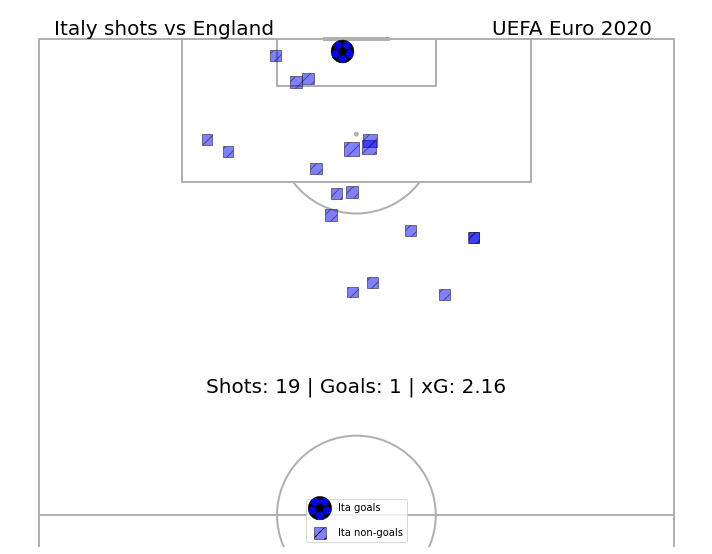

In [51]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
# Ita goals:
ita_sc_g = pitch.scatter(ita_df_g["start_location_x"],
                         ita_df_g["start_location_y"],
                         s=ita_df_g["statsbomb_xg"]*500+100,
                         marker="football",
                         c=ita_color,
                         ax=ax,
                         label="Ita goals")
# Ita non-goal shots:
ita_sc_ng = pitch.scatter(ita_df_ng["start_location_x"],
                          ita_df_ng["start_location_y"],
                          s=ita_df_ng["statsbomb_xg"]*500+100,
                          c=ita_color,
                          alpha=0.5,
                          hatch="//",
                          edgecolor="#101010",
                          marker="s",
                          ax=ax,
                          label="Ita non-goals")
fig.text(0.08, 0.92, "Italy shots vs England",
         size=20,
         ha="left")
fig.text(0.8, 0.92, "UEFA Euro 2020",
         size=20,
         ha="center")

basic_info_txt = "Shots: " + str(ita_tot_shots) + " | Goals: " + str(ita_tot_goals) + " | xG: " + str(ita_tot_xg)
fig.text(0.5, 0.3, basic_info_txt,
         size=20,
         ha="center")
ax.legend(labelspacing=1.5, loc="lower center")

In [44]:
eng_tot_shots = eng_df.shape[0]
eng_tot_goals = eng_df_g.shape[0]
eng_tot_xg = eng_df["statsbomb_xg"].sum().round(2)

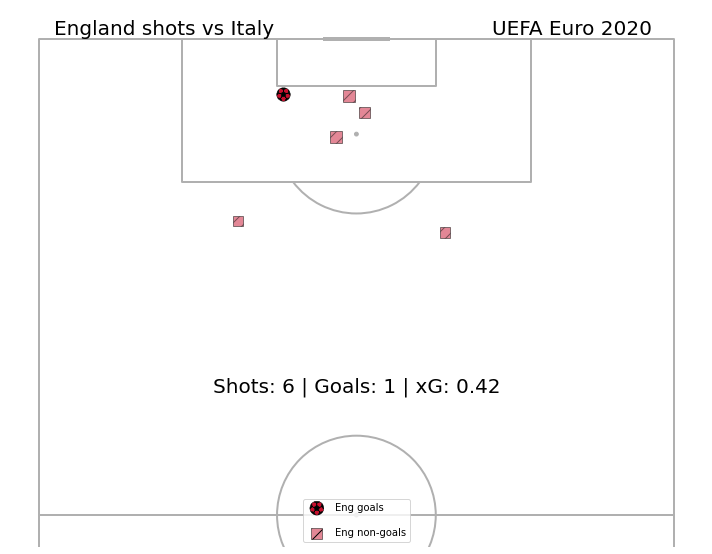

In [50]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10, 8))
# Ita goals:
eng_sc_g = pitch.scatter(eng_df_g["start_location_x"],
                         eng_df_g["start_location_y"],
                         s=eng_df_g["statsbomb_xg"]*500+100,
                         marker="football",
                         c=eng_color,
                         ax=ax,
                         label="Eng goals")
# Ita non-goal shots:
eng_sc_ng = pitch.scatter(eng_df_ng["start_location_x"],
                          eng_df_ng["start_location_y"],
                          s=eng_df_ng["statsbomb_xg"]*500+100,
                          c=eng_color,
                          alpha=0.5,
                          hatch="//",
                          edgecolor="#101010",
                          marker="s",
                          ax=ax,
                          label="Eng non-goals")
fig.text(0.08, 0.92, "England shots vs Italy",
         size=20,
         ha="left")
fig.text(0.8, 0.92, "UEFA Euro 2020",
         size=20,
         ha="center")

basic_info_txt = "Shots: " + str(eng_tot_shots) + " | Goals: " + str(eng_tot_goals) + " | xG: " + str(eng_tot_xg)
fig.text(0.5, 0.3, basic_info_txt,
         size=20,
         ha="center")
ax.legend(labelspacing=1.5, loc="lower center")